In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras import layers, models
from tensorflow.keras import utils
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

C:\Users\adity\AppData\Local\Temp\ipykernel_16324\183644343.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("train.csv")
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [3]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [5]:
df.isna().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [6]:
df["Patient Age"].fillna(str(df["Patient Age"].mode().values[0]), inplace=True)
df["Inherited from father"] = df["Inherited from father"].fillna(str(df["Inherited from father"].mode().values[0]))
df["Maternal gene"] = df["Maternal gene"].fillna(str(df["Maternal gene"].mode().values[0]))
df["Mother's age"] = df["Mother's age"].fillna(str(df["Mother's age"].mode().values[0]))
df["Father's age"] = df["Father's age"].fillna(str(df["Father's age"].mode().values[0]))
df["Respiratory Rate (breaths/min)"] = df["Respiratory Rate (breaths/min)"].fillna(str(df["Respiratory Rate (breaths/min)"].mode().values[0]))
df["Heart Rate (rates/min"] = df["Heart Rate (rates/min"].fillna(str(df["Heart Rate (rates/min"].mode().values[0]))
df["Test 1"] = df["Test 1"].fillna(str(df["Test 1"].mode().values[0]))
df["Test 2"] = df["Test 2"].fillna(str(df["Test 2"].mode().values[0]))
df["Test 3"] = df["Test 3"].fillna(str(df["Test 3"].mode().values[0]))
df["Test 4"] = df["Test 4"].fillna(str(df["Test 4"].mode().values[0]))
df["Test 5"] = df["Test 5"].fillna(str(df["Test 5"].mode().values[0]))
df["Parental consent"] = df["Parental consent"].fillna(str(df["Parental consent"].mode().values[0]))
df["Follow-up"] = df["Follow-up"].fillna(str(df["Follow-up"].mode().values[0]))
df["Gender"] = df["Gender"].fillna(str(df["Gender"].mode().values[0]))
df["Birth asphyxia"] = df["Birth asphyxia"].fillna(str(df["Birth asphyxia"].mode().values[0]))
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].fillna(str(df["Autopsy shows birth defect (if applicable)"].mode().values[0]))
df["Folic acid details (peri-conceptional)"] = df["Folic acid details (peri-conceptional)"].fillna(str(df["Folic acid details (peri-conceptional)"].mode().values[0]))
df["H/O serious maternal illness"] = df["H/O serious maternal illness"].fillna(str(df["H/O serious maternal illness"].mode().values[0]))
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].fillna(str(df["H/O radiation exposure (x-ray)"].mode().values[0]))
df["H/O substance abuse"] = df["H/O substance abuse"].fillna(str(df["H/O substance abuse"].mode().values[0]))
df["Assisted conception IVF/ART"] = df["Assisted conception IVF/ART"].fillna(str(df["Assisted conception IVF/ART"].mode().values[0]))
df["History of anomalies in previous pregnancies"] = df["History of anomalies in previous pregnancies"].fillna(str(df["History of anomalies in previous pregnancies"].mode().values[0]))
df["No. of previous abortion"] = df["No. of previous abortion"].fillna(str(df["No. of previous abortion"].mode().values[0]))
df["Birth defects"] = df["Birth defects"].fillna(str(df["Birth defects"].mode().values[0]))
df["White Blood cell count (thousand per microliter)"] = df["White Blood cell count (thousand per microliter)"].fillna(str(df["White Blood cell count (thousand per microliter)"].mode().values[0]))
df["Blood test result"] = df["Blood test result"].fillna(str(df["Blood test result"].mode().values[0]))
df["Symptom 1"] = df["Symptom 1"].fillna(str(df["Symptom 1"].mode().values[0]))
df["Symptom 2"] = df["Symptom 2"].fillna(str(df["Symptom 2"].mode().values[0]))
df["Symptom 3"] = df["Symptom 3"].fillna(str(df["Symptom 3"].mode().values[0]))
df["Symptom 4"] = df["Symptom 4"].fillna(str(df["Symptom 4"].mode().values[0]))
df["Symptom 5"] = df["Symptom 5"].fillna(str(df["Symptom 5"].mode().values[0]))
df["Genetic Disorder"] = df["Genetic Disorder"].fillna(str(df["Genetic Disorder"].mode().values[0]))
df["Disorder Subclass"] = df["Disorder Subclass"].fillna(str(df["Disorder Subclass"].mode().values[0]))


C:\Users\adity\AppData\Local\Temp\ipykernel_16324\3735443044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Patient Age"].fillna(str(df["Patient Age"].mode().values[0]), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_16324\3735443044.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Patient Age"].fillna(str(df["Patient Age"].

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       22083 non-null  object 
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             22083 non-null  object 
 4   Maternal gene                                     22083 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

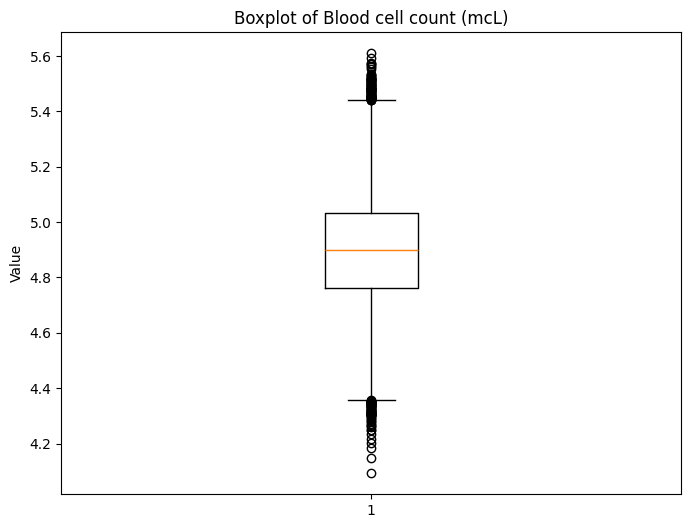

In [8]:

def visualize_outliers(df):
    for column in df.select_dtypes(include=['number']):
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column])
        plt.title(f'Boxplot of {column}')
        plt.ylabel('Value')
        plt.show()
visualize_outliers(df)


In [9]:


def handle_outliers(df):
    for column in df.select_dtypes(include=['number']):
        Q1 = df[column].quantile(0.25)
        Q2 = df[column].quantile(0.75)
        IQR = Q2 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q2 + 1.5 * IQR
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        df.loc[outliers, column] = df[column].median()
        
    return df
df = handle_outliers(df)


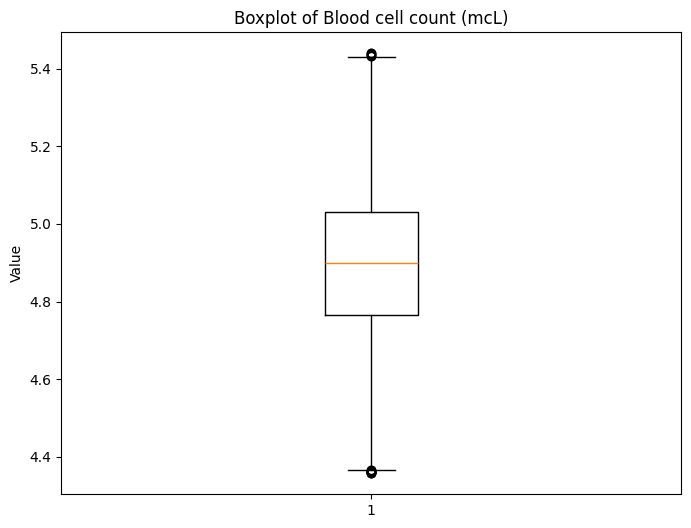

In [10]:
visualize_outliers(df)

In [11]:
df.drop(["Patient Id", "Family Name", "Patient First Name", "Father's name", "Institute Name", "Location of Institute", "Place of birth"], axis=1, inplace=True)


In [12]:
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.52256,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.0,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.09821,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,8.0,No,Yes,No,Yes,4.974220,23.0,56.0,Alive,Normal (30-60),...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,7.0,Yes,No,Yes,Yes,4.858543,19.0,20.0,Alive,Tachypnea,...,Multiple,8.43767,abnormal,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [13]:
print("Status: ",df["Status"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Respiratory Rate (breaths/min): ",df["Respiratory Rate (breaths/min)"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Heart Rate (rates/min: ",df["Heart Rate (rates/min"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Follow-up: ",df["Follow-up"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Gender: ",df["Gender"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Autopsy shows birth defect (if applicable): ",df["Autopsy shows birth defect (if applicable)"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Birth defects: ",df["Birth defects"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Blood test result: ",df["Blood test result"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Genetic Disorder: ",df["Genetic Disorder"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print("Disorder Subclass: ",df["Disorder Subclass"].unique())
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

Status:  ['Alive' 'Deceased']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Heart Rate (rates/min:  ['Normal' 'Tachycardia']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Follow-up:  ['High' 'Low']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Gender:  ['Ambiguous' 'Male' 'Female']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Autopsy shows birth defect (if applicable):  ['Not applicable' 'No' 'Yes']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Birth defects:  ['Singular' 'Multiple']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Disorder Subclass:  ["Leber's hereditary optic neuro

In [14]:
df["Genes in mother's side"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Genes in mother's side"]]
df["Inherited from father"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Inherited from father"]]
df["Maternal gene"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Maternal gene"]]
df["Paternal gene"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Paternal gene"]]
df["Parental consent"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Parental consent"]]
df["Birth asphyxia"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Birth asphyxia"]]
df["Folic acid details (peri-conceptional)"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Folic acid details (peri-conceptional)"]]
df["H/O radiation exposure (x-ray)"] = [1 if str(i).strip() == "Yes" else 0 for i in df["H/O radiation exposure (x-ray)"]]
df["H/O substance abuse"] = [1 if str(i).strip() == "Yes" else 0 for i in df["H/O substance abuse"]]
df["Assisted conception IVF/ART"] = [1 if str(i).strip() == "Yes" else 0 for i in df["Assisted conception IVF/ART"]]
df["History of anomalies in previous pregnancies"] = [1 if str(i).strip() == "Yes" else 0 for i in df["History of anomalies in previous pregnancies"]]
df["H/O serious maternal illness"] = [1 if str(i).strip() == "Yes" else 0 for i in df["H/O serious maternal illness"]]
df["Status"] = [1 if str(i).strip() == "Alive" else 0 for i in df["Status"]]
df["Respiratory Rate (breaths/min)"] = [1 if str(i).strip() == "Normal (30-60)" else 0 for i in df["Respiratory Rate (breaths/min)"]]
df["Follow-up"] = [1 if str(i).strip() == "High" else 0 for i in df["Follow-up"]]
df["Birth defects"] = [1 if str(i).strip() == "Singular" else 0 for i in df["Birth defects"]]
df["Heart Rate (rates/min"] = [1 if str(i).strip() == "Normal" else 0 for i in df["Heart Rate (rates/min"]]
df["Disorder Subclass"] = [1 if i.strip() == "Leber's hereditary optic neuropathy"
                           else 0 if i.strip() == "Cystic fibrosis"
                           else 2 if i.strip() == "Diabetes"
                           else 3 if i.strip() == "Leigh syndrome"
                           else 4 if i.strip() == "Cancer"
                           else 5 if i.strip() == "Tay-Sachs"
                           else 6 if i.strip() == "Hemochromatosis"
                           else 7 if i.strip() == "Mitochondrial myopathy"
                           else 8 for i in df["Disorder Subclass"]]
df["Gender"] = [1 if i.strip() == "Male" else 0 if i.strip() == "Female" else 2 for i in df["Gender"]]
df["Autopsy shows birth defect (if applicable)"] = [1 if i.strip() == "Yes" else 0 if i.strip() == "No" else 2 if i.strip() == "None" else 3 for i in df["Autopsy shows birth defect (if applicable)"]]
df["Blood test result"] = [1 if i.strip() == "slightly abnormal" else 0 if i.strip() == "normal" else 2 if i.strip() == "inconclusive" else 3 for i in df["Blood test result"]]
df["Genetic Disorder"] = [1 if i.strip() == "Mitochondrial genetic inheritance disorders" else 0 if i.strip() == "Multifactorial genetic inheritance disorders" else 2 for i in df["Genetic Disorder"]]
df

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,1,1,...,1,9.857562,1,1.0,1.0,1.0,1.0,1.0,1,1
1,4.0,1,1,0,0,4.910669,23.0,23.0,0,0,...,0,5.52256,0,1.0,1.0,1.0,1.0,0.0,1,0
2,6.0,1,0,0,0,4.893297,41.0,22.0,1,1,...,1,3.0,0,0.0,1.0,1.0,1.0,1.0,0,2
3,12.0,1,0,1,0,4.705280,21.0,20.0,0,0,...,1,7.919321,2,0.0,0.0,1.0,0.0,0.0,1,3
4,11.0,1,0,1,1,4.720703,32.0,20.0,1,0,...,0,4.09821,1,0.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,1,1,1,0,5.258298,35.0,64.0,0,1,...,0,6.584811,2,0.0,0.0,1.0,0.0,0.0,1,3
22079,8.0,0,1,0,1,4.974220,23.0,56.0,1,1,...,0,7.041556,2,1.0,1.0,1.0,1.0,0.0,0,2
22080,8.0,1,0,1,0,5.186470,35.0,51.0,0,0,...,1,7.715464,0,0.0,0.0,0.0,1.0,0.0,1,7
22081,7.0,1,0,1,1,4.858543,19.0,20.0,1,0,...,0,8.43767,3,1.0,1.0,1.0,0.0,0.0,1,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  int64  
 2   Inherited from father                             22083 non-null  int64  
 3   Maternal gene                                     22083 non-null  int64  
 4   Paternal gene                                     22083 non-null  int64  
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  int64  
 9   Respiratory Rate 

In [16]:
df.describe()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.0,22083.000000,...,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,0.595164,0.391432,0.609383,0.433591,4.898533,0.501879,0.553095,0.556990,1.0,0.447267,...,0.552642,0.449169,0.225513,0.225286,0.549472,0.554906,0.549337,1.444052,1.253272,3.667980
std,0.490871,0.488082,0.487900,0.495582,0.193856,0.500008,0.497184,0.496753,0.0,0.497223,...,0.497232,0.497421,0.417929,0.417780,0.497558,0.496987,0.497571,1.067584,0.613765,2.364828
min,0.000000,0.000000,0.000000,0.000000,4.357634,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.765231,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,1.000000,0.000000,1.000000,0.000000,4.899399,1.000000,1.000000,1.000000,1.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,5.031438,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,5.439651,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,8.000000


In [17]:
df = df.apply(pd.to_numeric, downcast="float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

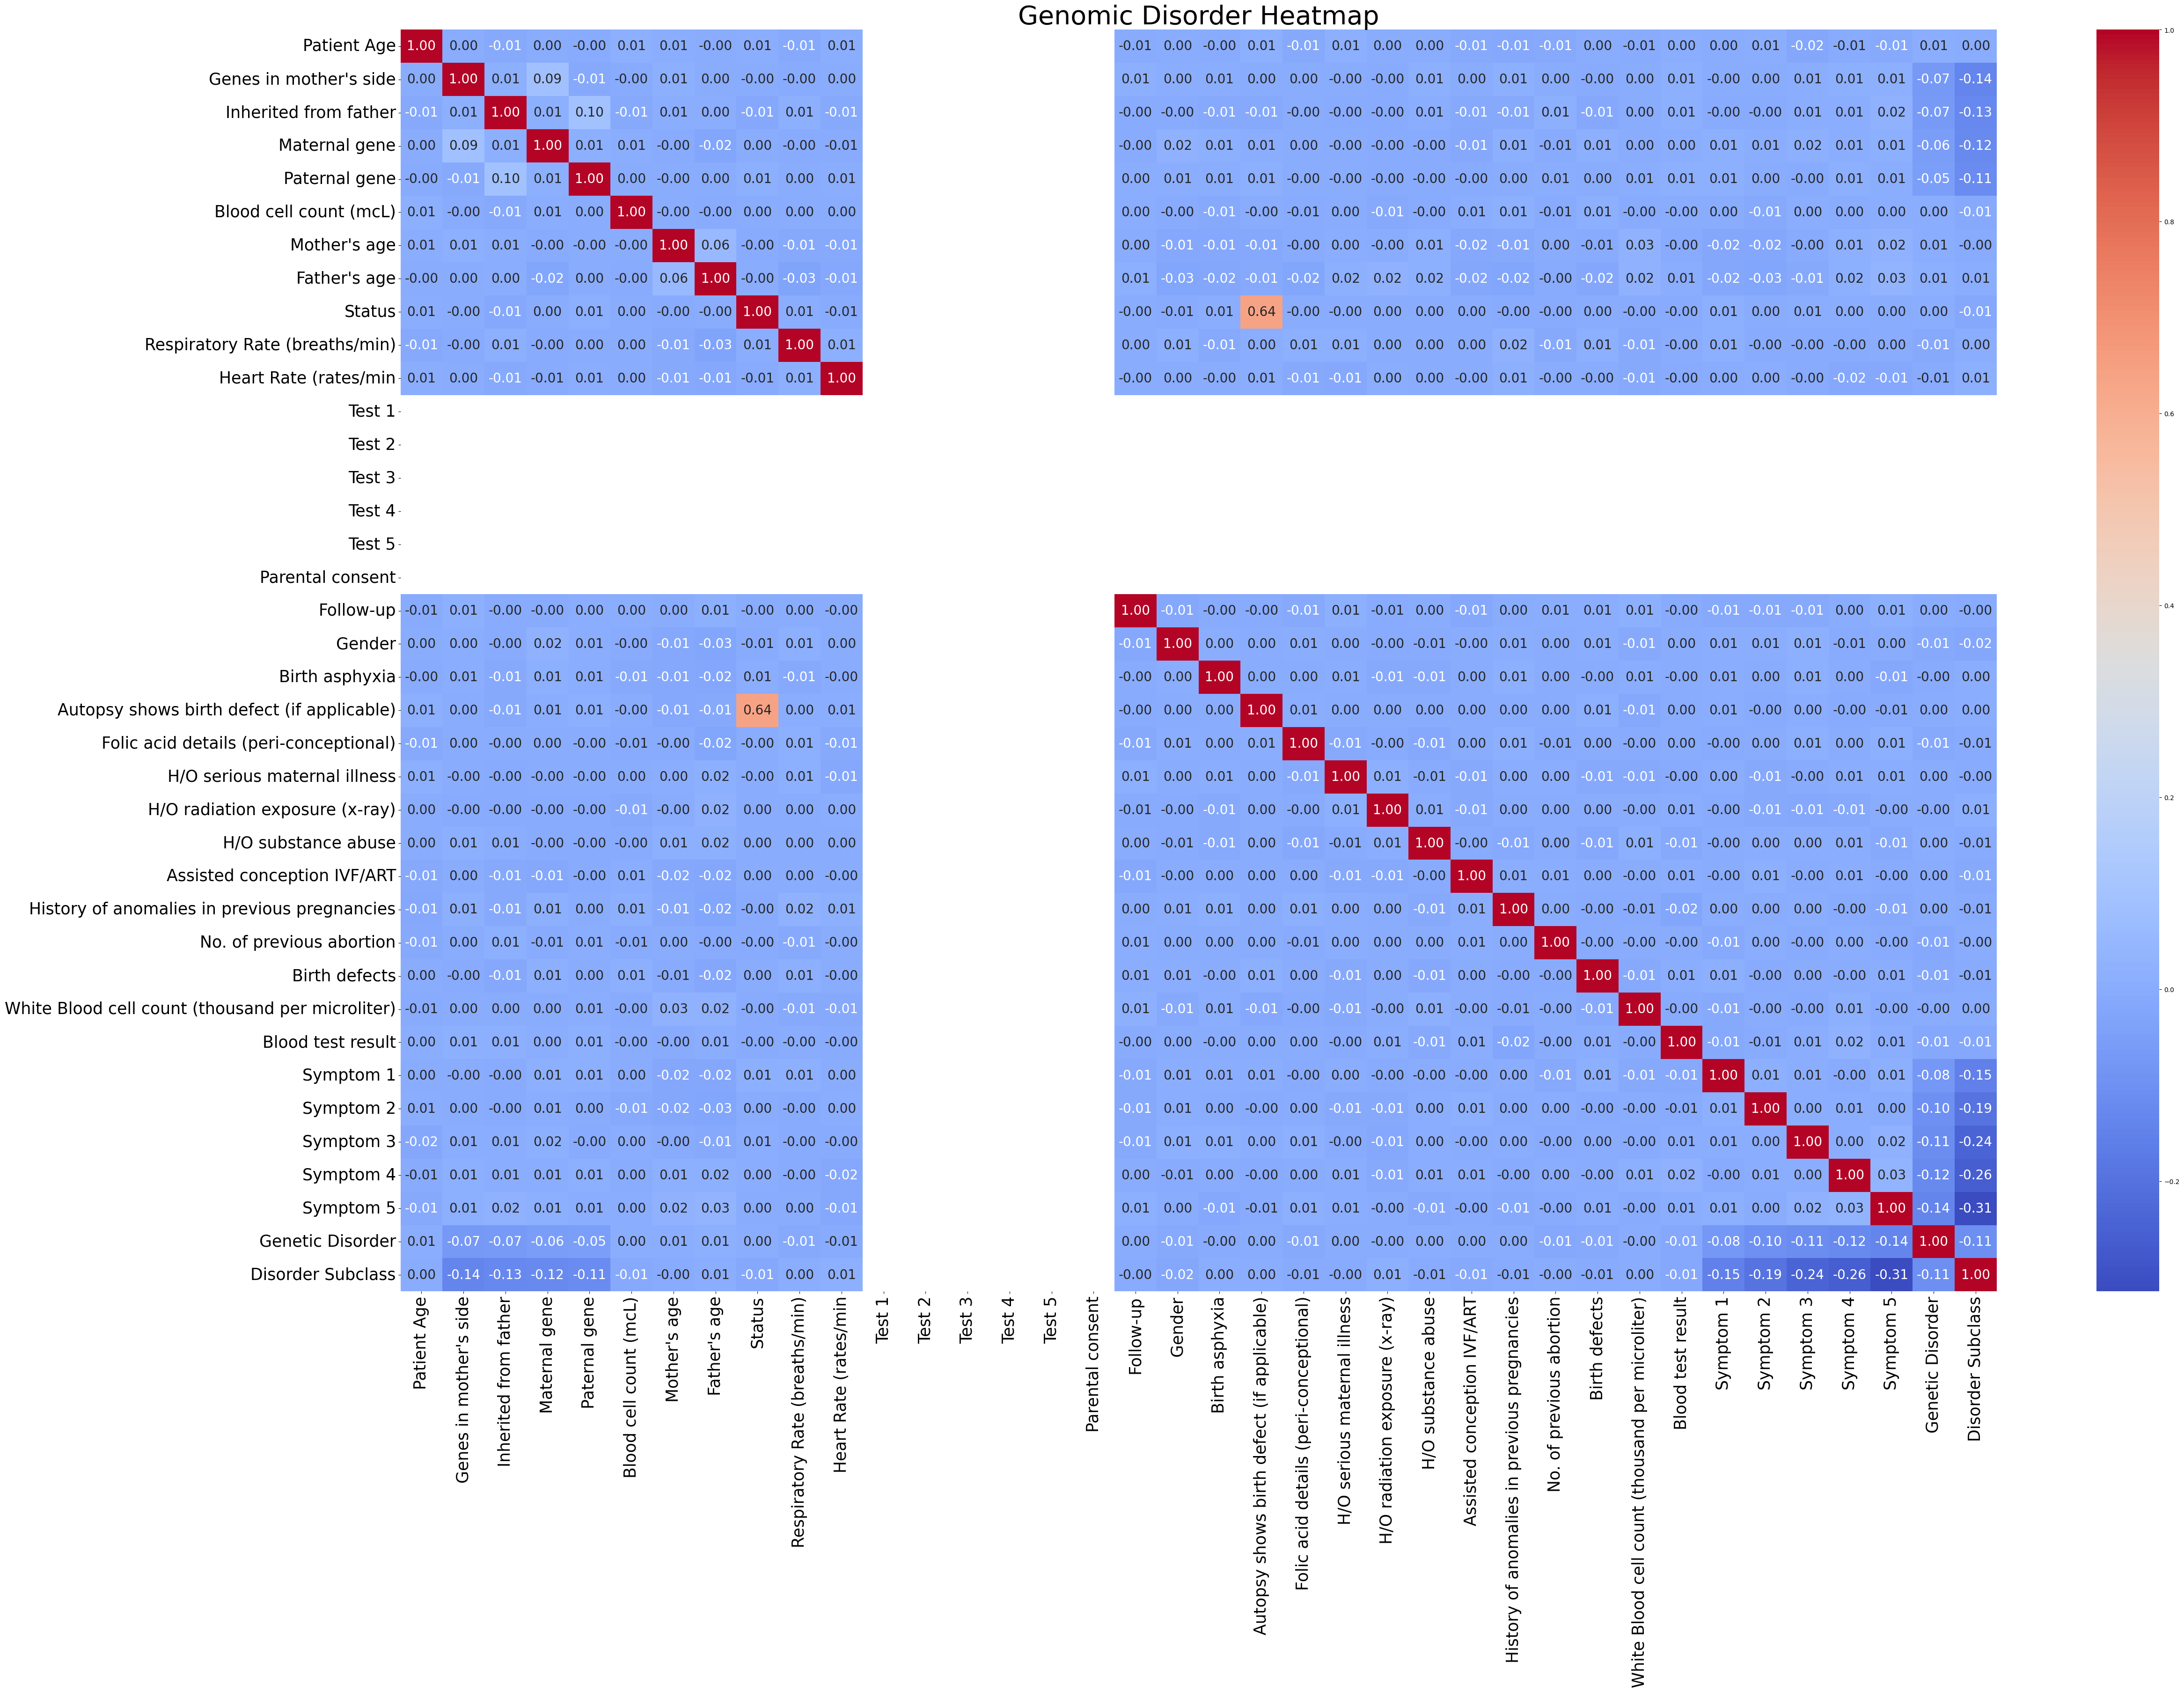

In [18]:
Non_numeric_columns = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(columns=Non_numeric_columns)
df_corr = df_numeric.corr()

fig, ax = plt.subplots(figsize=(55, 35))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', annot_kws={"fontsize": 20}, fmt=".2f")

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.title('Genomic Disorder Heatmap', fontsize=40)
plt.show()


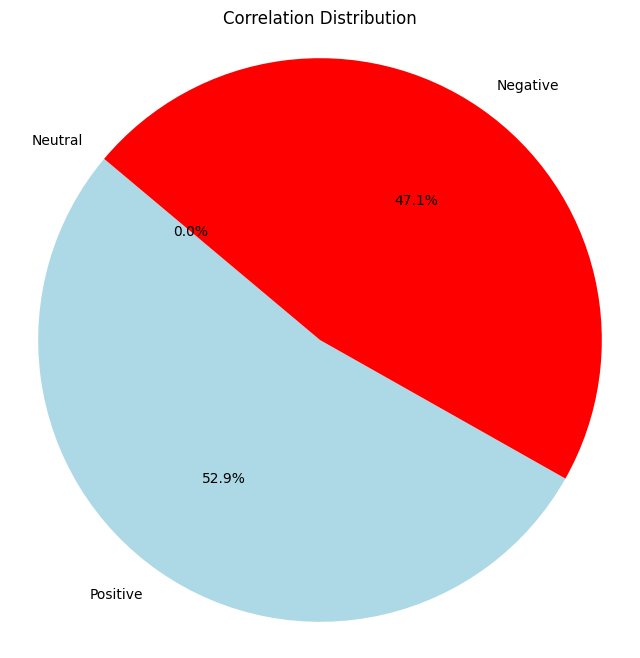

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with your actual dataset file name
#df = pd.read_csv('train.csv')

# Convert non-numeric values to NaN
#df = df.apply(pd.to_numeric, errors='coerce')

# Calculate correlations among all variables
correlation_matrix = df.corr()

# Flatten the correlation matrix and count the occurrences of different correlation values
correlation_values = correlation_matrix.unstack()
correlation_counts = correlation_values.value_counts()

# Extract counts for positive, negative, and neutral correlations
positive_count = correlation_counts[correlation_counts.index > 0].sum()
negative_count = correlation_counts[correlation_counts.index < 0].sum()
neutral_count = correlation_counts[correlation_counts.index == 0].sum()

# Create labels and counts for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red', 'lightgrey'])
plt.title('Correlation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show plot
plt.show()





C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


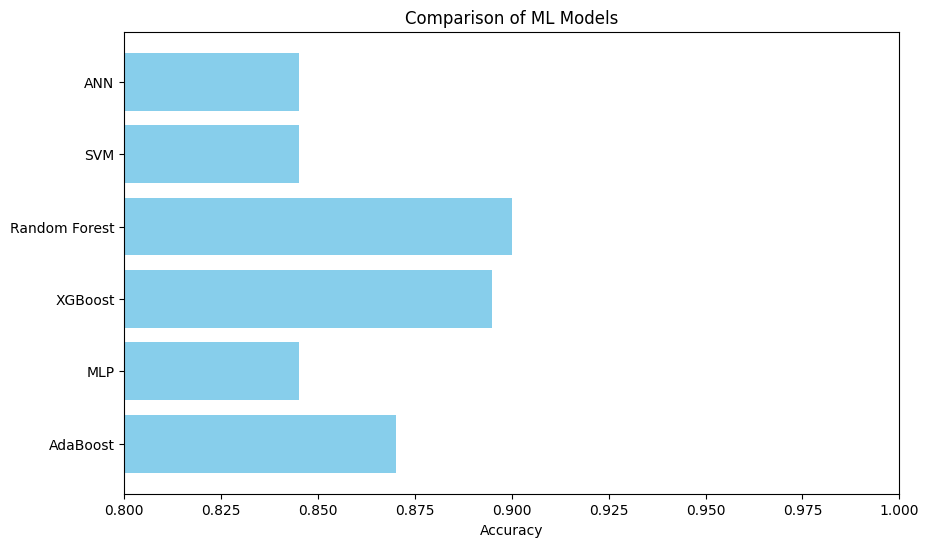

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "ANN": MLPClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of ML Models')
plt.xlim(0.8, 1.0)  # Limiting x-axis from 0.8 to 1.0 for better visualization
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()

In [21]:
x,y = df.loc[:,df.columns != 'Genetic Disorder'], df.loc[:,'Genetic Disorder']

ANN

In [22]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:


model = models.Sequential([
    layers.Input(shape=(37,)),  
    layers.Dense(160, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax'),
])



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,123 (145.01 KB)

 Trainable params: 37,123 (145.01 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:

y_train = Y_train
y_test = Y_test
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [26]:
model.fit(X_train, Y_train, epochs =50, validation_data=[X_test, Y_test])

Epoch 1/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6326 - loss: 0.7909 - val_accuracy: 0.8438 - val_loss: 0.4241
Epoch 2/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.3627 - val_accuracy: 0.8934 - val_loss: 0.3315
Epoch 3/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9039 - loss: 0.2942 - val_accuracy: 0.8916 - val_loss: 0.3296
Epoch 4/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9074 - loss: 0.2745 - val_accuracy: 0.9047 - val_loss: 0.3031
Epoch 5/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2630 - val_accuracy: 0.8990 - val_loss: 0.3085
Epoch 6/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.2466 - val_accuracy: 0.8891 - val_loss: 0.3394
Epoch 7/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9235 - loss: 0.2283 - val_accuracy: 0.8959 - val_loss: 0.3207
Epoch 8/50
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2249 - val_accuracy: 0.

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0875 - loss: 49.9231 
Test Loss: 49.834957122802734
Test Accuracy: 0.08308807015419006


SVM

Accuracy: 69.84%
              precision    recall  f1-score   support

         0.0       0.48      0.16      0.25       395
         1.0       0.69      0.86      0.77      2477
         2.0       0.75      0.57      0.65      1545

    accuracy                           0.70      4417
   macro avg       0.64      0.53      0.55      4417
weighted avg       0.69      0.70      0.68      4417



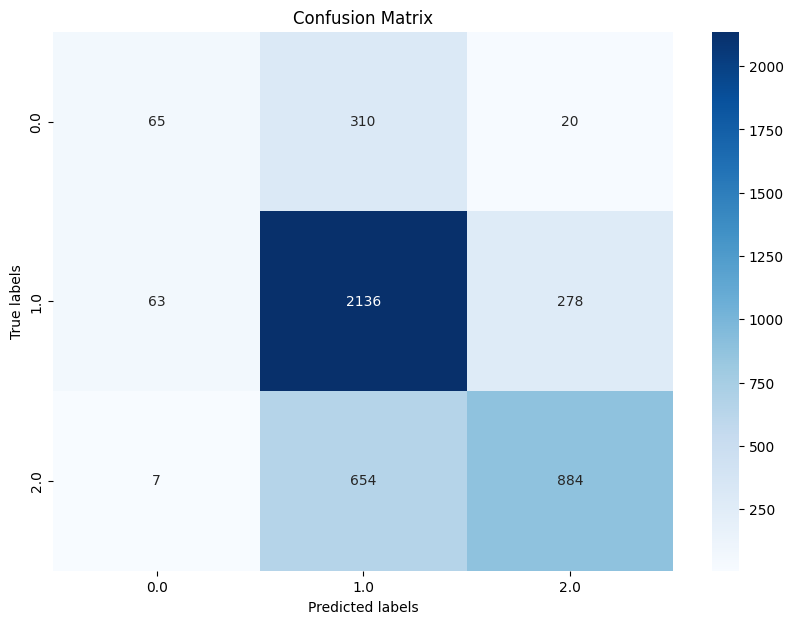

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


RANDOM FOREST

Accuracy: 88.84%
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       433
         1.0       0.87      0.94      0.91      2485
         2.0       0.91      0.84      0.87      1499

    accuracy                           0.89      4417
   macro avg       0.90      0.85      0.87      4417
weighted avg       0.89      0.89      0.89      4417



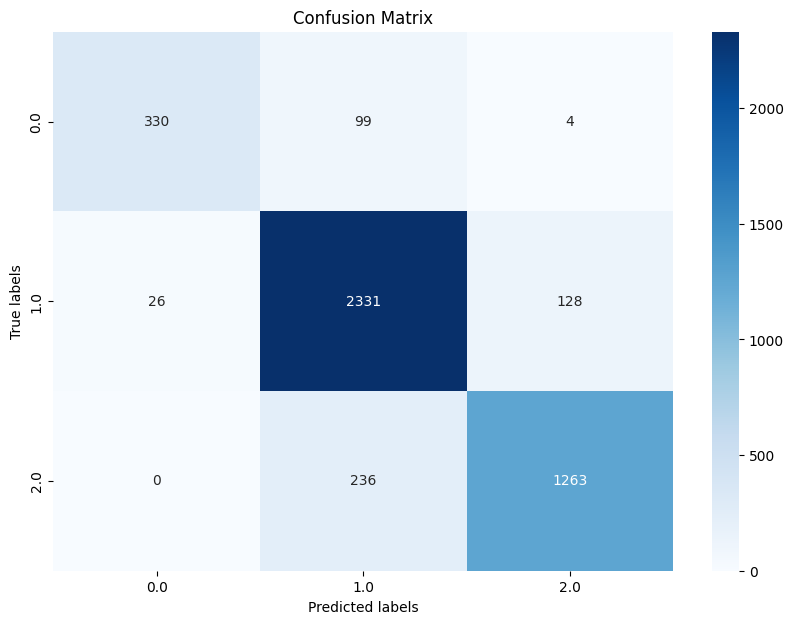

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df.drop('Genetic Disorder', axis=1)
y = df['Genetic Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


XG BOOST

Accuracy: 91.31%


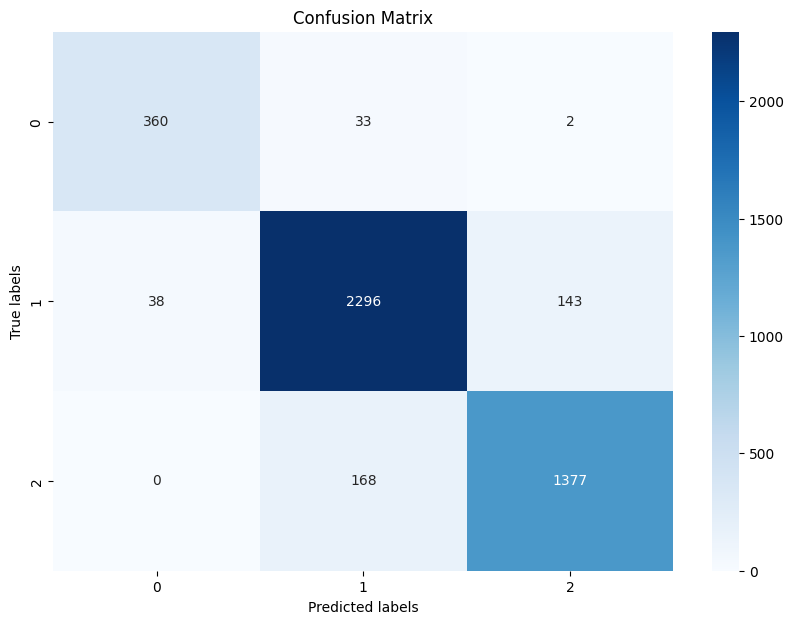

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


MLP

Accuracy: 86.42%


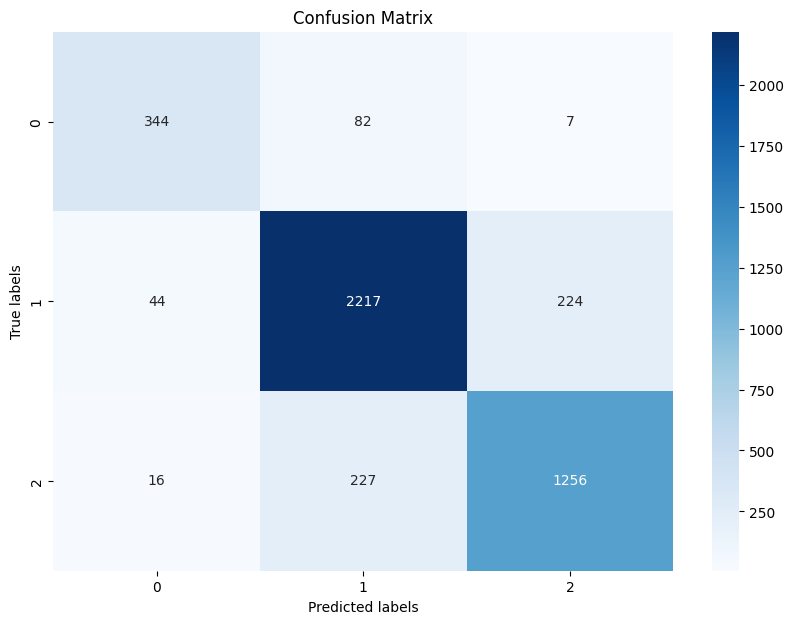

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your own dataset, replace 'your_dataset.csv' with your file path
#data = pd.read_csv('your_dataset.csv')
# Assuming the last column is the target variable and the rest are features
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#

# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', max_iter=1000, random_state=42)
# Train the MLPClassifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


ADABOOST USING DECISION TREE

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the dataset and created df

# Define features (X) and target variable (y)
X = df.drop('Genetic Disorder', axis=1)  # Features
y = df['Genetic Disorder']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a decision tree classifier with specified parameters
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)

# Creating an AdaBoost classifier without specifying base_estimator
ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=1)

# Fitting the AdaBoost classifier to the training data
ada.fit(X_train, y_train)

# Predicting the labels of the training data using the AdaBoost classifier
y_train_pred = ada.predict(X_train)

# Predicting the labels of the test data using the AdaBoost classifier
y_test_pred = ada.predict(X_test)

# Calculating the accuracy of the AdaBoost classifier on the training data
ada_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculating the accuracy of the AdaBoost classifier on the test data
ada_test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the accuracies
print(f'AdaBoost train/test accuracies: {ada_train_accuracy*100:.3f}/{ada_test_accuracy*100:.3f}')



C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost train/test accuracies: 78.003/79.126


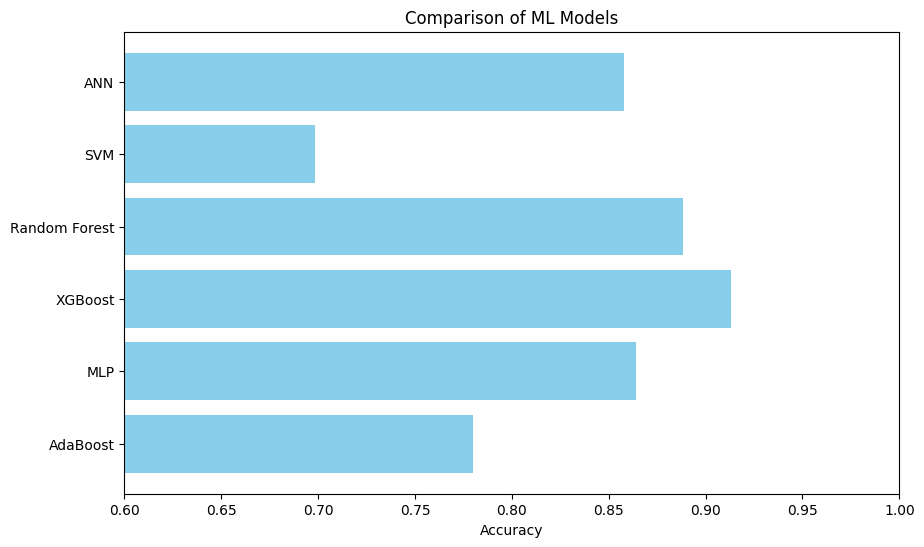

In [34]:
import matplotlib.pyplot as plt
# Dictionary containing model names as keys and their accuracies as values
results = {
    "ANN": 0.858,
    "SVM": 0.6984,
    "Random Forest": 0.8884,
    "XGBoost": 0.9131,
    "MLP": 0.8642,
    "AdaBoost": 0.78
}

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of ML Models')
plt.xlim(0.6, 1.0)  # Adjusting x-axis limits to better accommodate the provided accuracies
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()